# Layoffs Case Study

### Importing necessary libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    

### Data Import

In [41]:
url = "https://raw.githubusercontent.com/neerajcodes888/Data-Science/main/Case%20Study/Recent%20Layoffs%20Analysis/layoffs.csv"

data = pd.read_csv(url)

In [42]:
data.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Kaltura,New York City,70.0,8/7/2025,10%,Media,https://www.calcalistech.com/ctechnews/article...,Post-IPO,$166,United States,8/10/2025
1,Peloton,New York City,NaN,8/7/2025,6%,Fitness,https://www.reuters.com/technology/peloton-cut...,Post-IPO,$1900,United States,8/10/2025
2,Yotpo,New York City,200.0,8/5/2025,34%,Marketing,https://www.calcalistech.com/ctechnews/article...,Unknown,$436,United States,8/5/2025
3,Windsurf,SF Bay Area,30.0,8/5/2025,NaN,AI,https://techcrunch.com/2025/08/05/three-weeks-...,Acquired,$243,United States,8/10/2025
4,Wondery,Los Angeles,100.0,8/4/2025,NaN,Media,https://variety.com/2025/biz/news/amazon-reorg...,Acquired,$15,United States,8/5/2025


### Let's handle some missing data

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4127 entries, 0 to 4126
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              4127 non-null   object 
 1   location             4126 non-null   object 
 2   total_laid_off       2689 non-null   float64
 3   date                 4127 non-null   object 
 4   percentage_laid_off  2626 non-null   object 
 5   industry             4125 non-null   object 
 6   source               4124 non-null   object 
 7   stage                4120 non-null   object 
 8   funds_raised         3672 non-null   object 
 9   country              4125 non-null   object 
 10  date_added           4127 non-null   object 
dtypes: float64(1), object(10)
memory usage: 354.8+ KB


### We can remove some unwanted column . Here we can remove source col

In [44]:
data = data.drop('source',axis=1)

In [45]:
data

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
0,Kaltura,New York City,70.0,8/7/2025,10%,Media,Post-IPO,$166,United States,8/10/2025
1,Peloton,New York City,NaN,8/7/2025,6%,Fitness,Post-IPO,$1900,United States,8/10/2025
2,Yotpo,New York City,200.0,8/5/2025,34%,Marketing,Unknown,$436,United States,8/5/2025
3,Windsurf,SF Bay Area,30.0,8/5/2025,NaN,AI,Acquired,$243,United States,8/10/2025
4,Wondery,Los Angeles,100.0,8/4/2025,NaN,Media,Acquired,$15,United States,8/5/2025
...,...,...,...,...,...,...,...,...,...,...
4122,Service,Los Angeles,NaN,3/16/2020,100%,Travel,Seed,$5,United States,8/31/2020
4123,HopSkipDrive,Los Angeles,8.0,3/13/2020,10%,Transportation,Unknown,$45,United States,4/3/2020
4124,Panda Squad,SF Bay Area,6.0,3/13/2020,75%,Consumer,Seed,$1,United States,4/17/2020
4125,Tamara Mellon,Los Angeles,20.0,3/12/2020,40%,Retail,Series C,$90,United States,3/31/2020


### Now , we can see that source column has been removed.

#### Checking NA or null values

In [46]:
data.isnull()

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
0,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4122,False,False,True,False,False,False,False,False,False,False
4123,False,False,False,False,False,False,False,False,False,False
4124,False,False,False,False,False,False,False,False,False,False
4125,False,False,False,False,False,False,False,False,False,False


In [47]:
data.isnull().sum()

company                   0
location                  1
total_laid_off         1438
date                      0
percentage_laid_off    1501
industry                  2
stage                     7
funds_raised            455
country                   2
date_added                0
dtype: int64

In [48]:
data.isna()

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
0,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4122,False,False,True,False,False,False,False,False,False,False
4123,False,False,False,False,False,False,False,False,False,False
4124,False,False,False,False,False,False,False,False,False,False
4125,False,False,False,False,False,False,False,False,False,False


In [49]:
data.isna().sum()

company                   0
location                  1
total_laid_off         1438
date                      0
percentage_laid_off    1501
industry                  2
stage                     7
funds_raised            455
country                   2
date_added                0
dtype: int64

### We can analyse , whether we have to drop rows or replace with needful

In [50]:
data.tail(100)

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
4027,Maven,Seattle,31.0,3/30/2020,9%,Media,Post-IPO,$77,United States,4/8/2020
4028,Blume Global,SF Bay Area,30.0,3/30/2020,10%,Logistics,Unknown,NaN,United States,4/1/2020
4029,Catalant,Boston,30.0,3/30/2020,NaN,Other,Series E,$110,United States,3/31/2020
4030,Starship Technologies,"Tallinn,Non-U.S.",30.0,3/30/2020,NaN,Transportation,Series A,$82,Estonia,4/8/2020
4031,Loftsmart,New York City,25.0,3/30/2020,75%,Real Estate,Series A,$18,United States,4/6/2020
...,...,...,...,...,...,...,...,...,...,...
4122,Service,Los Angeles,NaN,3/16/2020,100%,Travel,Seed,$5,United States,8/31/2020
4123,HopSkipDrive,Los Angeles,8.0,3/13/2020,10%,Transportation,Unknown,$45,United States,4/3/2020
4124,Panda Squad,SF Bay Area,6.0,3/13/2020,75%,Consumer,Seed,$1,United States,4/17/2020
4125,Tamara Mellon,Los Angeles,20.0,3/12/2020,40%,Retail,Series C,$90,United States,3/31/2020


### We can remove na values.

In [51]:
data.dropna(inplace=True)

In [52]:
data

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
0,Kaltura,New York City,70.0,8/7/2025,10%,Media,Post-IPO,$166,United States,8/10/2025
2,Yotpo,New York City,200.0,8/5/2025,34%,Marketing,Unknown,$436,United States,8/5/2025
5,Clear,"Bengaluru,Non-U.S.",145.0,8/1/2025,16%,Finance,Series C,$140,India,8/5/2025
13,ConsenSys,New York City,47.0,7/22/2025,7%,Crypto,Series D,$726,United States,7/22/2025
19,Scale AI,SF Bay Area,200.0,7/16/2025,14%,Data,Series E,$602,United States,7/17/2025
...,...,...,...,...,...,...,...,...,...,...
4120,Inspirato,Denver,130.0,3/16/2020,22%,Travel,Series C,$79,United States,3/31/2020
4121,Help.com,Austin,16.0,3/16/2020,100%,Support,Seed,$6,United States,4/16/2020
4123,HopSkipDrive,Los Angeles,8.0,3/13/2020,10%,Transportation,Unknown,$45,United States,4/3/2020
4124,Panda Squad,SF Bay Area,6.0,3/13/2020,75%,Consumer,Seed,$1,United States,4/17/2020


In [53]:
data.shape

(1688, 10)

In [54]:
data.isnull().sum()

company                0
location               0
total_laid_off         0
date                   0
percentage_laid_off    0
industry               0
stage                  0
funds_raised           0
country                0
date_added             0
dtype: int64

## Now Start our study

### 1. How many layoffs occurred in total across all companies?


In [55]:
data['total_laid_off'].sum()

np.float64(516759.0)

### Total Layoffs happened = 516759

### 2. Which company had the highest number of layoffs?


In [56]:
data.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head(3)

company
Intel        37000.0
Microsoft    25305.0
Amazon       18000.0
Name: total_laid_off, dtype: float64

In [57]:
data[data['company']=='Intel']

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
83,Intel,Sacramento,22000.0,4/23/2025,20%,Hardware,Post-IPO,$12,United States,4/23/2025
394,Intel,SF Bay Area,15000.0,8/1/2024,15%,Hardware,Post-IPO,$12,United States,8/1/2024


### As we can see that , Intel has highest layoffs during whole period

Text(0, 0.5, 'Total Laid Offs')

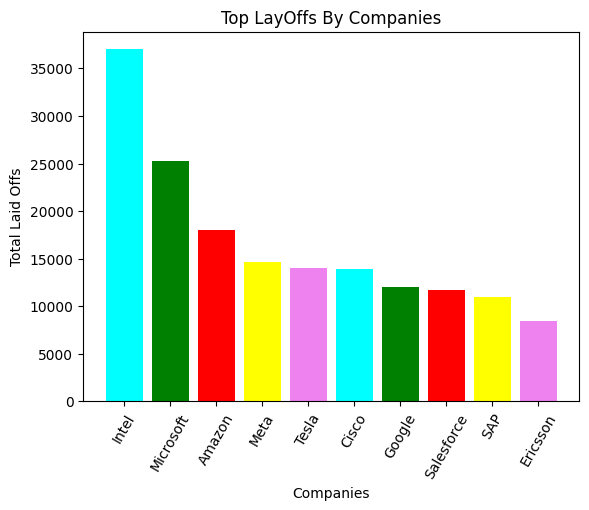

In [58]:
val = data.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head(10)
plt.bar(val.index,val.values,color=['cyan','green','red','yellow','violet'])
plt.xticks(rotation=60)
plt.title("Top LayOffs By Companies")
plt.xlabel('Companies')
plt.ylabel('Total Laid Offs') 

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1688 entries, 0 to 4125
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1688 non-null   object 
 1   location             1688 non-null   object 
 2   total_laid_off       1688 non-null   float64
 3   date                 1688 non-null   object 
 4   percentage_laid_off  1688 non-null   object 
 5   industry             1688 non-null   object 
 6   stage                1688 non-null   object 
 7   funds_raised         1688 non-null   object 
 8   country              1688 non-null   object 
 9   date_added           1688 non-null   object 
dtypes: float64(1), object(9)
memory usage: 145.1+ KB


In [60]:
data['percentage_laid_off'].isna().sum()

np.int64(0)

In [62]:
data['percentage_laid_off'] = data['percentage_laid_off'].str.replace('%', '', regex=False)

In [63]:
data['percentage_laid_off']=data['percentage_laid_off'].astype(int)

### What is the average percentage of layoffs across all companies?

In [64]:
round(data['percentage_laid_off'].mean(),2)

np.float64(22.02)

### Here we can see that , The avarage layoffs during whole is around 22%

In [65]:
data.head(3)

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised,country,date_added
0,Kaltura,New York City,70.0,8/7/2025,10,Media,Post-IPO,$166,United States,8/10/2025
2,Yotpo,New York City,200.0,8/5/2025,34,Marketing,Unknown,$436,United States,8/5/2025
5,Clear,"Bengaluru,Non-U.S.",145.0,8/1/2025,16,Finance,Series C,$140,India,8/5/2025


<span style='red'> Now, let's see that Which industry saw the highest total layoffs? <span>


In [70]:
data.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(3)


industry
Other             65630.0
Transportation    52363.0
Retail            50719.0
Name: total_laid_off, dtype: float64

### Let's visualize this

In [83]:
visuals = data.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10)
x,y = visuals.index,visuals.values

Text(0, 0.5, 'Industies')

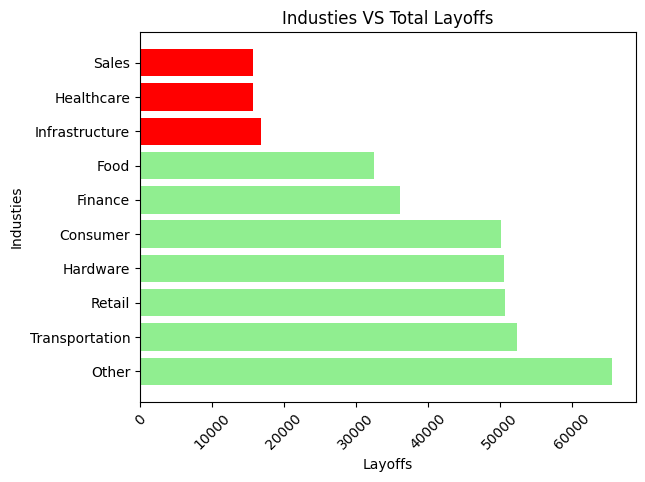

In [ ]:
plt.barh(x,y,color=['red' if val < 30000 else 'lightgreen' for val in y])
plt.xticks(rotation=45)
plt.title('Industies VS Total Layoffs')
plt.xlabel('Layoffs')
plt.ylabel('Industries')